### Linear Regression

#### Downloading the CSV files for the medical insurance

In [3]:
#from urllib.request import urlretrieve

In [4]:
#medical_file_path = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [5]:
#urlretrieve(medical_file_path, 'medical-charges.csv')

In [6]:
import pandas as pd

In [7]:
meds_df = pd.read_csv('medical-charges.csv')   ##Reading the CSV file through pandas

In [8]:
meds_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
meds_df.info() #checking for the datatypes in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
meds_df.describe() #getting some statistical info on the datasets

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Non null values: 1338 (full ds is completely filled with valid values)
mean - charges for health insurance: $13270.422 /n
min-charge for health insurance: $1121.874 /n
25% of the people have a charge <= $4740.287 /n
50% of the people have a charge <= $9382.03 /n
Max age of Insurance: 64years /n
Max Insurance charge: 64000 

*Visualisation on the data*

In [11]:
import plotly.express as px

In [12]:
import seaborn as sns

In [13]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

setting a new font and style for our graphs

In [14]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [15]:
fig = px.histogram(meds_df, x = 'age', marginal='box', nbins= 47, title= 'Age Distribution' )
fig.update_layout(bargap = 0.1)
fig.show()

In [16]:
##Plotting a histogram for BMI


fig2 = px.histogram(meds_df, x = 'bmi', marginal= 'box', color_discrete_sequence= ['yellow'], title = 'BMI distribution')
fig2.update_layout(bargap = 0.1)
fig2.show()

In [17]:
'''Plotting a chart for Charges for Smoker/Non-Smoker'''


fig3 = px.histogram(meds_df, x = 'charges', marginal= 'box' , color = 'smoker' , color_discrete_sequence= ['red', 'grey'], 
        title = 'Annual medical Insurance')
#^^ the obove plot will plot the smoker and the non smoker on the same graph making it easier to understand the medical 
#premium for the smoker & non smoker lot
fig3.update_layout(bargap = 0.1)
fig3.show()

In [18]:
meds_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [19]:
fig_sex = px.histogram(meds_df, x = 'charges', marginal= 'box', color = 'sex', color_discrete_sequence=['red', 'yellowgreen'], title = 'Charges acc to Gender')
fig_sex.update_layout(bargap = 0.1)
fig_sex.show()

In [20]:
fig_reg = px.histogram(meds_df, x = 'charges', marginal='box', color = 'region', color_discrete_sequence=['blue', 'black','red', 'yellow'],
title='Charges based on Region')

fig_reg.update_layout(bargap=0.1)
fig_reg.show()

"" Visualising data for every column specific to get more insights on the data using Scatter Plot""

In [21]:
fig_sc = px.scatter(meds_df, x = 'age', y = 'charges', color = 'smoker', 
                      opacity= 0.7, hover_data=['sex'], title = 'Age vs. Charges')

fig_sc.update_traces(marker_size = 5)
fig_sc.show()

#### Observations from the above chart:-

1. The annual premium goes up linearly with age for smokers and non smokers.
2. Around 80% of Non-smokers have a medium low premium(around $17k)
- Some non-smokers do have a high insurance maybe for some accidental or fatal ailment case.

3. Around 80% of the Smokers have a medium high premium(around $25k)
   - Some Smokers incur a higher price (reasons might be same as non smokers)

In [22]:
fig_sc2 = px.scatter(meds_df, x = 'bmi', y = 'charges', color = 'smoker', hover_data=['sex'], opacity = 0.7, title = 'BMI vs Charges')
fig_sc2.update_traces(marker_size = 6)
fig_sc2.show()

##### Some more insights of charges with other columns such as children, region:

In [23]:
px.violin(meds_df, x= 'children', y= 'charges', title = 'Children vs. Charges')


#### Correlation between data of the dataframe:

In [24]:
meds_df.charges.corr(meds_df.age)

0.2990081933306478

to correlate with smoker column we need to change the categorical column into a numeric column

In [25]:
smoker_val = {'no':0, 'yes':1}
smoker_num = meds_df.smoker.map(smoker_val)
smoker_num

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [26]:
meds_df.charges.corr(smoker_num)

0.7872514304984778

""" Highest Correlation between all the corr values """

In [27]:
meds_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


__Using a heatmap to show the correlation between all columns__

Text(0.5, 1.0, 'HeatMap for Correlation')

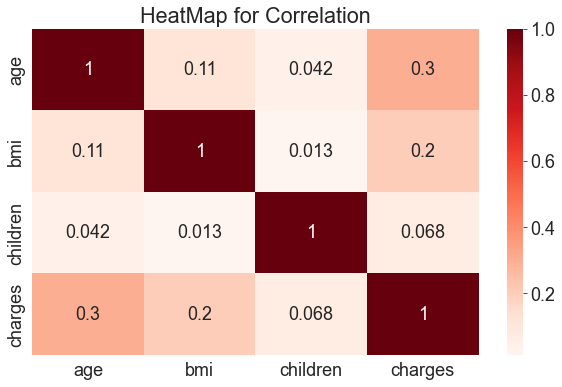

In [28]:
sns.heatmap(meds_df.corr(), cmap='Reds', annot= True)
plt.title("HeatMap for Correlation")

### Linear Regression using single feature:

In [29]:
#Extracting the rows of data for non smokers:

non_smoker_df = meds_df[meds_df.smoker == 'no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


Text(0.5, 1.0, 'Age vs Charges for Non-Smokers')

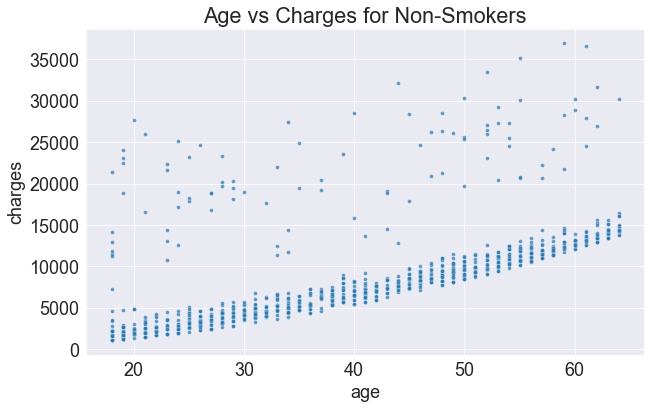

In [30]:
#Plotting a scatter plot for Non-smokers vs. Charges:

sns.scatterplot(data=non_smoker_df, x='age', y= 'charges', alpha=0.7, s = 15)
plt.title("Age vs Charges for Non-Smokers")

In [31]:
#Defining a function to perform linear regression:




def estimator_lnr_reg(age, w, b):
    return w*age + b

In [32]:
w = 60
b = 200


predict = estimator_lnr_reg(35, w, b)

In [33]:
predict

2300

In [34]:
example = meds_df.charges[meds_df.age == 35]
example

38      39774.27630
93       5729.00530
150      5125.21570
173      5246.04700
207     20984.09360
361      4751.07000
383      5846.91760
437      5926.84600
449      4762.32900
518      5240.76500
558     39983.42595
637     24915.04626
730     19361.99880
778      5934.37980
785      6414.17800
838      6402.29135
919      5245.22690
965      4746.34400
1040    20234.85475
1127     5836.52040
1153     5630.45785
1165     5227.98875
1205     5116.50040
1273     4747.05290
1318    19496.71917
Name: charges, dtype: float64

In [35]:
estimated = estimator_lnr_reg(non_smoker_df.age, w, b)
estimated

1       1280
2       1880
3       2180
4       2120
5       2060
        ... 
1332    3320
1333    3200
1334    1280
1335    1280
1336    1460
Name: age, Length: 1064, dtype: int64

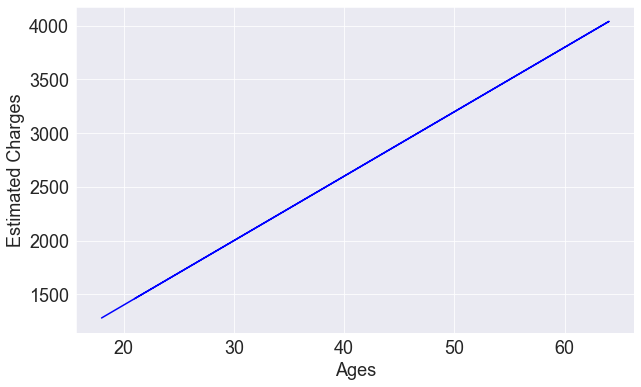

In [36]:
#Plotting a graph to see whether this is a linear relational graph


plt.plot(non_smoker_df.age, estimated, color= 'b')
plt.xlabel("Ages")
plt.ylabel("Estimated Charges")
plt.show()

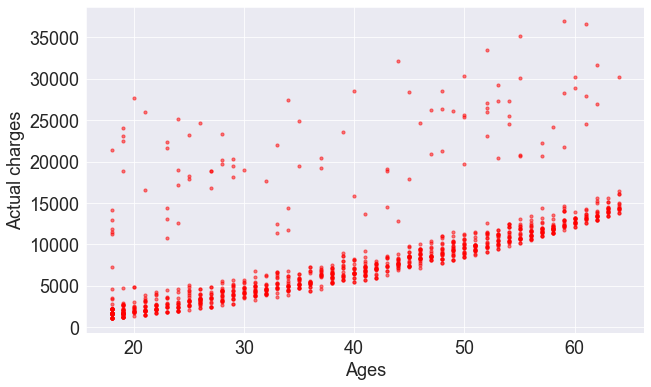

In [37]:
plt.scatter(non_smoker_df.age, non_smoker_df.charges, color = 'r', alpha= 0.5, s = 10)
plt.xlabel("Ages")
plt.ylabel("Actual charges")
plt.show()

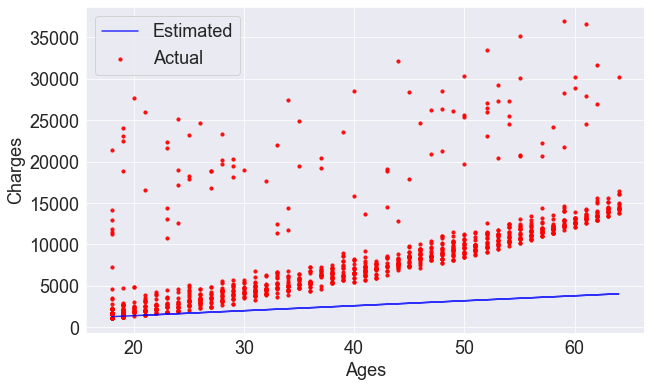

In [38]:
#Lets try to fit Our line on the actual values and see if it actually is linearly fitting for it

plt.plot(non_smoker_df.age, estimated, color = 'b', alpha = 0.8)
plt.scatter(non_smoker_df.age, non_smoker_df.charges, color='r', alpha= 0.9, s = 10)
plt.xlabel("Ages")
plt.ylabel("Charges")
plt.legend(['Estimated', 'Actual'])
plt.show()

we are not at all accurate according to the charges on the scatter plot above

In [39]:
# Try to Improve the Model:


def try_estimation(w, b):
    age = non_smoker_df.age
    target = non_smoker_df.charges

    est=estimator_lnr_reg(age, w, b)


    plt.plot(age, est, color = 'r', alpha = 0.8)
    plt.scatter(age, target, color = 'b', alpha = 0.9, s = 10)
    plt.xlabel("Age")
    plt.ylabel("Charges")
    plt.legend(["Estimated charge", "Actual Charge"])
    plt.show()

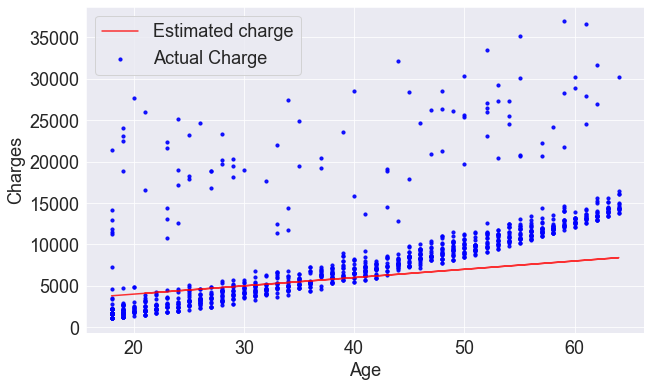

In [40]:
try_estimation(100, 2000)

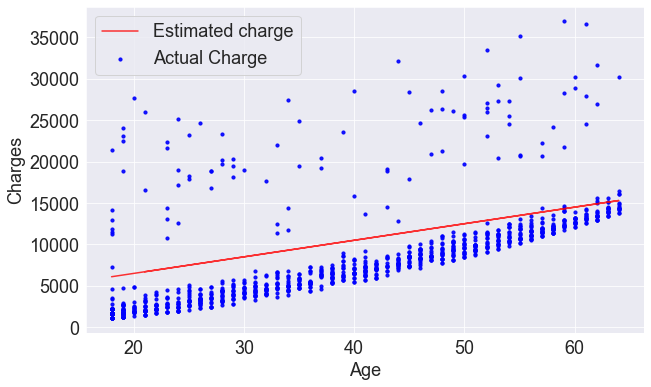

In [41]:
try_estimation(200, 2500)

#### Calculating Root Mean Squared Error:

In [42]:
import numpy as np

In [43]:
def calc_rmse(target, predict):
    return np.sqrt(np.mean(np.square(predict - target)))

In [44]:
w= 50
b =100

age_col = non_smoker_df.age
target = non_smoker_df.charges


In [45]:
predict = estimator_lnr_reg(age_col, w, b)
predict

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

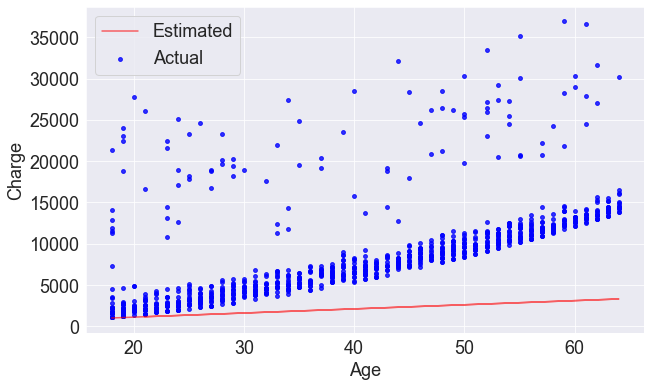

In [46]:
plt.plot(age_col, predict, color = 'r', alpha = 0.6)
plt.scatter(age_col, target, color = 'b', alpha = 0.8, s = 15)
plt.xlabel("Age")
plt.ylabel("Charge")
plt.legend(['Estimated', 'Actual'])
plt.show()

In [47]:
calc_rmse(target, predict)

8461.949562575493

##### this means our model is predicting $8461 + or - 

In [48]:
#getting rmse losses for multiple weights(w) and biases(b):


def try_estimation(w, b):
    age = non_smoker_df.age
    target = non_smoker_df.charges

    est=estimator_lnr_reg(age, w, b)


    plt.plot(age, est, color = 'r', alpha = 0.8)
    plt.scatter(age, target, color = 'b', alpha = 0.9, s = 10)
    plt.xlabel("Age")
    plt.ylabel("Charges")
    plt.legend(["Estimated charge", "Actual Charge"])
    plt.show()

    rmse_loss = calc_rmse(target, est)
    print("Rmse Loss for the given w and b: ", rmse_loss)

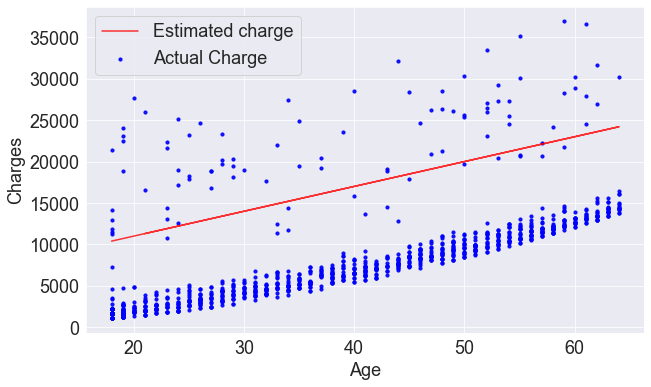

Rmse Loss for the given w and b:  9601.992249808254


In [49]:
try_estimation(300, 5000)

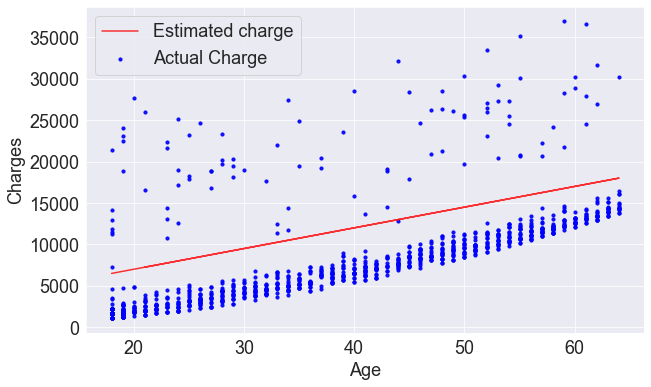

Rmse Loss for the given w and b:  5782.742666944203


In [50]:
try_estimation(250, 2000)

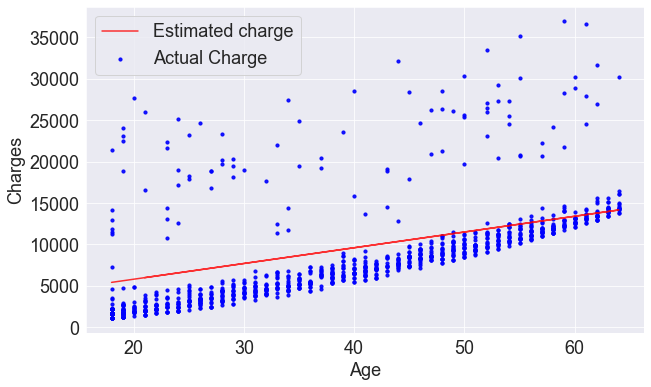

Rmse Loss for the given w and b:  4900.982146628824


In [51]:
try_estimation(190, 1999)

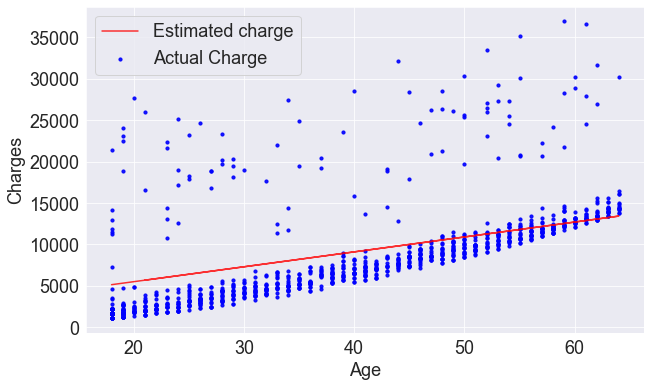

Rmse Loss for the given w and b:  4853.403482213087


In [52]:
try_estimation(180, 1900)

#### Linear Regression using SciKit-Learn

In [53]:
import sklearn

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
model = LinearRegression(n_jobs=-1)

In [56]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print(inputs.shape)
print(targets.shape)

(1064, 1)
(1064,)


In [57]:
model.fit(inputs, targets)

LinearRegression(n_jobs=-1)

In [58]:
model.predict(np.array([[37], [22], [59]]))

c:\Program Files\Python38\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 7796.78921819,  3788.05552572, 13676.26530048])

#### Age                                  -             Medical Charges

1. 37                                     -             $7796.789
2. 22                                     -             $3788.055
3. 59                                     -            $13676.265

In [59]:
predict = model.predict(inputs)


In [60]:
predict

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [61]:
loss_val = calc_rmse(targets, predict)
loss_val

4662.505766636395

so we have a loss of $4662 i.e. every target is off by approx $4662

In [62]:
#the best values of w and b found out by the linear regression model



print("w is: ", model.coef_)

print("b is: ", model.intercept_)

w is:  [267.24891283]
b is:  -2091.4205565650864


In [63]:
#trying the SGDRegressor


from sklearn.linear_model import SGDRegressor

In [64]:
model_new = SGDRegressor()

In [65]:
model_new.fit(inputs, targets)

SGDRegressor()

In [66]:
new_age = np.array([47, 55, 18, 20])
new_age.reshape(-1, 1)

array([[47],
       [55],
       [18],
       [20]])

In [67]:
model_new.predict(new_age.reshape(-1, 1))


c:\Program Files\Python38\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but SGDRegressor was fitted with feature names



array([ 8695.5053524 , 11023.25613911,   257.40875056,   839.34644724])

In [68]:
predict2 = model_new.predict(inputs)

In [69]:
predict2

array([ 257.40875056, 3167.09723395, 4621.94147565, ...,  257.40875056,
        257.40875056, 1130.31529558])

In [70]:
print("w is: ", model_new.coef_)
print("b is: ", model_new.intercept_)

w is:  [290.96884834]
b is:  [-4980.03051954]


In [71]:
calc_rmse(targets, predict2)

5066.566764689152

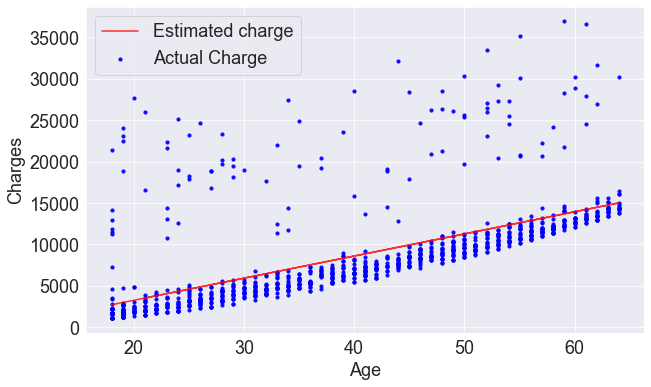

Rmse Loss for the given w and b:  4662.505766636395


In [72]:
try_estimation(model.coef_, model.intercept_)

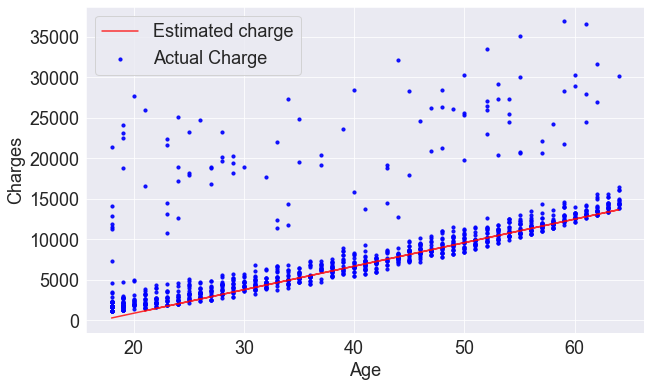

Rmse Loss for the given w and b:  5066.566764689152


In [73]:
try_estimation(model_new.coef_, model_new.intercept_)

##### Regression pattern for smoker dataset:

In [74]:
smoker_df = meds_df[meds_df.smoker == 'yes']
smoker_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [75]:
s_input = smoker_df[['age']]
s_target = smoker_df.charges


In [76]:
model_3 = LinearRegression()


In [77]:
model_3.fit(s_input, s_target)


LinearRegression()

In [78]:
s_new_age = np.array([33, 47, 18, 25, 30])
s_new_age.reshape(-1,1)

array([[33],
       [47],
       [18],
       [25],
       [30]])

In [79]:
model_3.predict(s_new_age.reshape(-1,1))

c:\Program Files\Python38\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([30366.96899654, 34640.29542608, 25788.40496489, 27925.06817966,
       29451.25619021])

In [80]:
est_new = model_3.predict(s_input)

In [81]:
est_new

array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351, 31282.68180287, 34945.53302819,
       31282.68180287, 37997.90904929, 25788.40496489, 36471.72103874,
       26398.88016911, 28840.78098599, 28535.54338388, 27009.35537333,
       31587.91940498, 34029.82022186, 37692.67144718, 38303.1466514 ,
       39829.33466195, 37387.43384507, 31893.15700709, 38913.62185562,
       26398.88016911, 39524.09705984, 29146.0185881 , 33724.58261975,
       26093.642567  , 30061.73139443, 30672.20659865, 29451.25619021,
       34335.05782397, 33114.10741553, 34945.53302819, 25788.40496489,
       29451.25619021, 33114.10741553, 25788.40496489, 39524.09705984,
       31282.68180287, 28535.54338388, 30977.44420076, 26093.642567  ,
       33114.10741553, 32503.63221131, 26093.642567  , 27314.59297544,
       39524.09705984, 25788.40496489, 39524.09705984, 36776.95864085,
      

In [82]:
print("W is =", model_3.coef_)
print("B is =", model_3.intercept_)

W is = [305.23760211]
B is = 20294.12812691597


In [83]:
calc_rmse(s_target, est_new)

10711.00334810241

In [84]:
def try_estimation_new(w, b):
    s_input = smoker_df.age
    s_target = smoker_df.charges

    est_for_smokers = estimator_lnr_reg(s_input, w, b)

    plt.plot(s_input, est_for_smokers, color = 'b', alpha = 0.7)
    plt.scatter(s_input, s_target, color= 'r', alpha = 0.6, s = 9)
    plt.xlabel("Ages")
    plt.ylabel("Charges")
    plt.title("Ages Vs Charges")
    plt.legend(['Estimated Prices', 'Actual Charges'])
    plt.show()

    err = calc_rmse(s_target, est_for_smokers)
    print("Rmse Loss for the model: ", err)

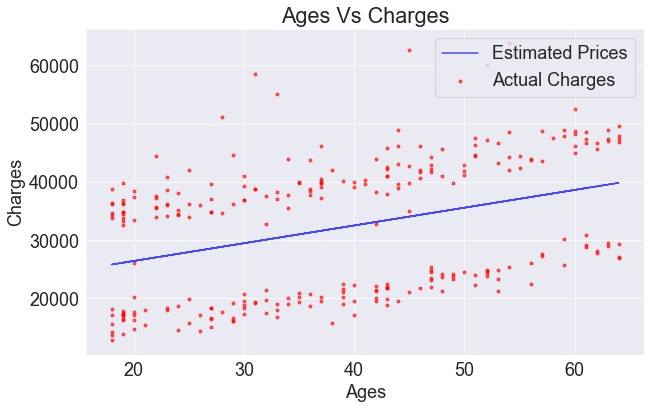

Rmse Loss for the model:  10711.00334810241


In [85]:
try_estimation_new(model_3.coef_, model_3.intercept_)

#### Linear Regression using Multiple input features:

In [86]:
inputs = non_smoker_df[['age', 'bmi']]
targets = non_smoker_df.charges 

new_model = LinearRegression(n_jobs= -1)

In [87]:
inputs.head(5)

,age,bmi
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880
5,31,25.740


In [88]:
new_model.fit(inputs, targets)

LinearRegression(n_jobs=-1)

In [89]:
predict_new = new_model.predict(inputs)

In [90]:
predict_new

array([2749.08516308, 5412.40282772, 6673.94368635, ..., 2735.99553127,
       2770.87763119, 3493.32334862])

In [91]:
calc_rmse(targets, predict_new)

4662.3128354612945

In [92]:
#using more columns to see if some betterment in losses occur



features = non_smoker_df[['age', 'bmi', 'children']]
labels = non_smoker_df.charges

In [93]:
lnr_mod = LinearRegression()

In [94]:
lnr_mod.fit(features, labels)

LinearRegression()

In [95]:
predictions = lnr_mod.predict(features)

In [96]:
predictions

array([2724.94209163, 6535.13457204, 6065.27173951, ..., 2134.51524931,
       2160.54349555, 2898.08585583])

In [97]:
calc_rmse(labels, predictions)

4608.470405038246

##### Taking categorical columns for the predictions:

<AxesSubplot:xlabel='smoker', ylabel='charges'>

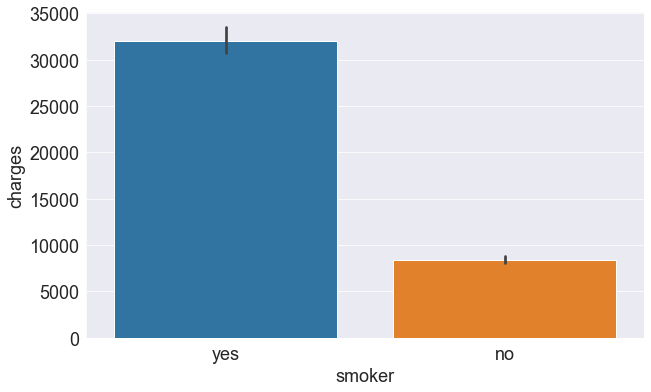

In [98]:
# Adding a Smoker code col for the Smoker categorical col

sns.barplot(data = meds_df, x = 'smoker', y ='charges' )


In [99]:
smoker_cat = {'no': 0, 'yes': 1}

meds_df['smoker_codes'] = meds_df.smoker.map(smoker_cat)

In [100]:
meds_df

,age,sex,bmi,children,smoker,region,charges,smoker_codes
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


"" now we have converted our smoker categorical data [yes/no] to numerical values [1/0] ""

__New Value for Charges__

$charges = w1 \times age + w2 \times bmi + w3 \times children + w4 \times smoker +b$

In [101]:
meds_df.charges.corr(meds_df.smoker_codes)

0.7872514304984778

In [102]:
#Performing Linear Regression in consideration with the new added columns: 


inputs, targets = meds_df[['age', 'bmi', 'children', 'smoker_codes']], meds_df['charges']

In [103]:
new_model = LinearRegression().fit(inputs, targets)

In [104]:
predict = new_model.predict(inputs)
predict

array([25587.42524891,  3880.94594512,  7158.62006921, ...,
        4398.7459491 ,  1615.83647369, 36793.67069541])

In [105]:
calc_rmse(targets, predict)

6056.439217188081

<AxesSubplot:xlabel='sex', ylabel='charges'>

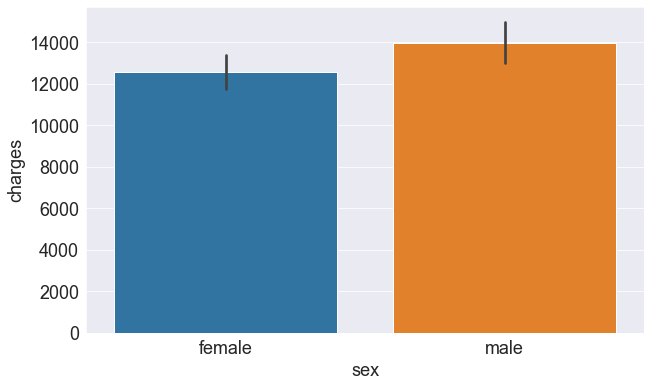

In [106]:
#now considering 'gender' column in for the predictions

sns.barplot(data= meds_df, x = 'sex', y='charges')

In [107]:
sex_cat = {'female':0, 'male':1}
meds_df['sex_col'] = meds_df.sex.map(sex_cat)


In [108]:
meds_df

,age,sex,bmi,children,smoker,region,charges,smoker_codes,sex_col
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


### New formula:

$charges = w1 \times age + w2 \times bmi + w3 \times children + w4 \times smoker + w5 \times sex + b$

In [109]:
inputs, targets = meds_df[['age', 'bmi', 'children', 'smoker_codes', 'sex_col']], meds_df['charges']

In [110]:
model = LinearRegression().fit(inputs, targets)


predict = model.predict(inputs)


In [111]:
predict

array([25661.85689486,  3818.77858262,  7096.73025538, ...,
        4465.88909619,  1676.96948913, 36863.89250792])

In [112]:
calc_rmse(targets, predict)

6056.100708754546


### One-hot Encoding

The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.

![](https://i.imgur.com/n8GuiOO.png)

In [113]:
import sklearn.preprocessing as sp


encoder_new = sp.OneHotEncoder()

In [114]:
encoder_new.fit(meds_df[['region']])

OneHotEncoder()

In [115]:
encoder_new.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [116]:
region_new = encoder_new.transform(meds_df[['region']]).toarray()

In [117]:
#adding this numerical regional data into the dataframe

In [118]:
meds_df[['NE', 'NW', 'SE', 'SW']] = region_new

In [119]:
meds_df

,age,sex,bmi,children,smoker,region,charges,smoker_codes,sex_col,NE,NW,SE,SW
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


### new formula for charges with regions combined:



$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times northeast + w_7 \times northwest + w_8 \times southeast + w_9 \times southwest +b$

In [120]:
inputs, targets = meds_df[['age', 'bmi', 'children', 'smoker_codes', 'sex_col', 'NE', 'NW', 'SE', 'SW']], meds_df['charges']

In [121]:
model = LinearRegression().fit(inputs, targets)

In [122]:
predict = model.predict(inputs)
predict

array([25293.7130284 ,  3448.60283431,  6706.9884907 , ...,
        4149.13248568,  1246.58493898, 37085.62326757])

In [123]:
calc_rmse(targets, predict)

6041.679651174452

#### Standardizing the values:

In [124]:
from sklearn.preprocessing import StandardScaler

In [125]:
scaler = StandardScaler()

In [126]:
numeric_cols = ['age', 'bmi', 'children']
scaler.fit(meds_df[numeric_cols])


StandardScaler()

In [127]:
scaled_features = scaler.transform(meds_df[numeric_cols])
scaled_features

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [128]:
meds_df

,age,sex,bmi,children,smoker,region,charges,smoker_codes,sex_col,NE,NW,SE,SW
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [129]:
categorical_data = ['smoker_codes', 'sex_col', 'NE', 'NW', 'SE', 'SW']

cat_inputs = meds_df[categorical_data].values
cat_inputs

array([[1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.]])

In [130]:
features = np.concatenate((scaled_features, cat_inputs), axis = 1)

In [131]:
labels = meds_df[['charges']]

In [132]:
model = LinearRegression().fit(features, labels)

In [133]:
predictions= model.predict(features)
predictions

array([[25293.7130284 ],
       [ 3448.60283431],
       [ 6706.9884907 ],
       ...,
       [ 4149.13248568],
       [ 1246.58493898],
       [37085.62326757]])

In [134]:
calc_rmse(labels, predictions)

C:\Users\acer\AppData\Roaming\Python\Python38\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



charges    6041.679651
dtype: float64

In [135]:
weight_df = pd.DataFrame({'features' : np.append(numeric_cols + categorical_data,  1),
                           'weights' : np.append(model.coef_, model.intercept_) })

weight_df.sort_values('weights', ascending = False)

,features,weights
3,smoker_codes,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,NE,587.009235
2,children,572.998210
6,NW,234.045336
4,sex_col,-131.314359
8,SW,-373.041756
7,SE,-448.012814


so now we can see the weights of the features much more precise than earlier

1- Smoker has an impact around __$23848.5__
2- Age impacts around __$3600__
3- BMI impacts around __$2067.7__